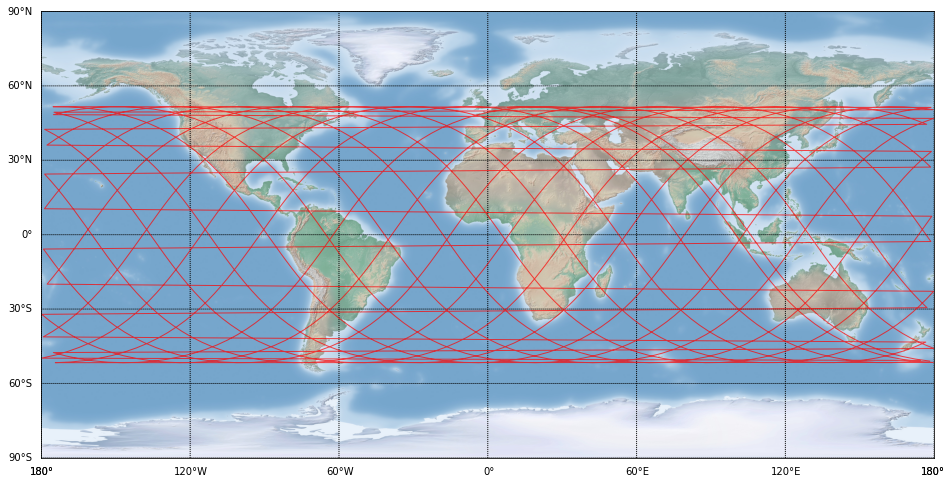

In [1]:
import ephem
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from itertools import chain

# TLE data for the International Space Station (ISS)
line1 = '1 25544U 98067A   23077.42870586  .00019077  00000-0  35022-3 0  9998'
line2 = '2 25544  51.6407  58.1634 0006059 106.0946  29.2524 15.49261381387718'

# Create an ephem satellite object from the TLE data
sat = ephem.readtle('ISS (ZARYA)', line1, line2)

# List to store the latitude and longitude of the satellite
latitudes, longitudes = [], []

# Calculate the position of the satellite at different times
for i in range(0, 86400, 60):  # Calculate the position every 10 seconds for 5 hours
    # Set the time for the calculation
    time = ephem.now() + i * ephem.second

    # Update the position of the satellite
    sat.compute(time)

    # Get the latitude and longitude of the satellite
    lat = sat.sublat / ephem.degree
    lon = sat.sublong / ephem.degree

    # Add the latitude and longitude to the list
    latitudes.append(lat)
    longitudes.append(lon)

# Create a 2D map of the Earth using basemap
fig = plt.figure(figsize=(16, 16), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # draw parallels and meridians
    m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0], fontsize=10)
    m.drawmeridians(np.arange(-180., 181., 60.), labels=[0, 0, 0, 1], fontsize=10)

draw_map(m)

# Convert the latitude and longitude to the map projection coordinates
x, y = m(longitudes, latitudes)

# Plot the trajectory of the satellite on the map
m.plot(x, y, color='red', linewidth=1, alpha=0.7)

# Show the map
plt.show()